In [ ]:
import numpy as np
import scipy.integrate as spi
from src.utils import *
import matplotlib.pyplot as plt

def create_g_opt_scoring_rule(ell, normalize=True):
    def g_opt(x, ell=1):
        """Computes g_{ell, Opt}(x) efficiently using numerical integration."""

        def integrand_1(t):
            return (t ** (ell - 8) * (1 - t) ** (2 * ell + 4)) ** (1 / (ell + 4))

        def integrand_2(t):
            return (t**ell * (1 - t) ** (2 * ell - 4)) ** (1 / (ell + 4))

        if np.isscalar(x):  # Single value case
            if x <= 0.5:
                return spi.quad(integrand_1, 0.5, x)[0]
            else:
                return spi.quad(integrand_2, 0.5, x)[0]

        else:  # Vectorized case for NumPy arrays
            result = np.zeros_like(x)
            mask = x <= 0.5
            result[mask] = np.array(
                [spi.quad(integrand_1, 0.5, xi)[0] for xi in x[mask]]
            )
            result[~mask] = np.array(
                [spi.quad(integrand_2, 0.5, xi)[0] for xi in x[~mask]]
            )
            return result

    values = np.linspace(0, 1, 10000)
    minimal_value = np.min(g_opt(values, ell))
    # print(minimal_value)

    def new_g_opt(x):
        if normalize:
            return g_opt(x, ell) - minimal_value
        else:
            return g_opt(x, ell)

    norm_const = spi.quad(lambda x: new_g_opt(x), 0, 1)[0]

    def newer_g_opt(x):
        if normalize:
            return new_g_opt(x) / norm_const
        else:
            return new_g_opt(x)

    return newer_g_opt


# Example usage
# ell_value = 1  # Example ell value
# integral_value = integral_g_opt(ell_value)
g_opt_1 = create_g_opt_scoring_rule(ell=1, normalize=False)
g_opt_2 = create_g_opt_scoring_rule(ell=2, normalize=False)
g_opt_8 = create_g_opt_scoring_rule(ell=8, normalize=False)


# Create a range of values from 0 to 1
p_values = np.linspace(0, 1, 100)
scores_opt_1 = g_opt_1(p_values)
scores_opt_2 = g_opt_2(p_values,)
scores_opt_8 = g_opt_8(p_values)
# Create the plot
plt.figure(figsize=(10, 5))
# Plot for optimal scoring rule
for i, ell in enumerate([1, 2, 8],1):
    plt.subplot(1, 3, i)
    scores = globals()[f"scores_opt_{ell}"]
    plt.plot(p_values, scores, label=f"ℓ={ell}")
    plt.title(f"Plot of $g_{{{ell}, \\mathrm{{Opt}}}}(x)$")
    plt.xlabel("Probability (p)")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))
# Plot for optimal scoring rule
plt.plot(p_values, scores_opt_1, label="ℓ=1")
plt.plot(p_values, scores_opt_2, label="ℓ=2")
plt.plot(p_values, scores_opt_8, label="ℓ=8")
plt.title("Plot of Optimal Scoring Rules")
plt.xlabel("Probability (p)")
plt.ylabel("Score")
plt.ylim(-20, 5)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from src.utils import *
import matplotlib.pyplot as plt

# Create a range of values from 0 to 1
p_values = np.linspace(0, 1, 100)

# Create the plot
plt.figure(figsize=(25, 5))

# Plot for quadratic scoring rule
plt.subplot(1, 5, 1)
scores_quadratic = quadratic_scoring_rule(p_values)
plt.plot(p_values, scores_quadratic)
plt.title("Quadratic Scoring Rule")
plt.xlabel("Probability (p)")
plt.ylabel("Score")
plt.grid(True)

# Plot for logarithmic scoring rule
plt.subplot(1, 5, 2)
scores_logarithmic = logarithmic_scoring_rule(p_values)
plt.plot(p_values, scores_logarithmic)
plt.title("Logarithmic Scoring Rule")
plt.xlabel("Probability (p)")
plt.ylabel("Score")
plt.grid(True)

# Plot for spherical scoring rule
plt.subplot(1, 5, 3)
scores_spherical = spherical_scoring_rule(p_values)
plt.plot(p_values, scores_spherical)
plt.title("Spherical Scoring Rule")
plt.xlabel("Probability (p)")
plt.ylabel("Score")
plt.grid(True)

# Plot for optimal scoring rule
plt.subplot(1, 5, 4)
scores_opt_1 = g_opt_1(p_values)
plt.plot(p_values, scores_opt_1)
# plt.title('Opt Scoring Rule')
plt.title("Plot of $g_{1, \mathrm{Opt}}(x)$")

plt.xlabel("Probability (p)")
plt.ylabel("Score")
plt.legend()
plt.grid(True)

plt.subplot(1, 5, 5)
scores_opt_2 = g_opt_2(p_values)
plt.plot(p_values, scores_opt_2, label="ℓ=2")
plt.title("Plot of $g_{2, \mathrm{Opt}}(x)$")

plt.xlabel("Probability (p)")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Lemma 2.5. A continuously differentiable scoring rule S is weakly proper if and only if for all p ∈ (0, 1),
# p*S'(p) = (1 - p)*S'(1 - p) and S'(p) ≥ 0. It is (strictly) proper if and only if additionally S''(p) > 0 almost
# everywhere on (0, 1).

# Corollary 2.6. Let f be strictly increasing almost everywhere (resp., nondecreasing everywhere) and continu-
# ously differentiable on (0, 1). Then f can be extended to a continuously differentiable proper (resp., weakly
# proper) scoring rule on (0, 1) by defining f'(p) = 1/p * (1 - p) * f''(p) for p ∈ (0,1).

import sympy as sp


def extend_to_proper_scoring_rule(f_prime):
    x = sp.symbols("x")

    # Define the extension using the symmetry condition from Corollary 2.6
    extended_f_prime = sp.Piecewise(
        (f_prime, x <= 0.5), ((1 - x) / x * f_prime.subs(x, 1 - x), x > 0.5)
    )

    return extended_f_prime

In [4]:
import scipy


#
# h_1 =  integral of ((t - 1)^(4/3))/t between 1/2 and x
# defined over (0, 1/2)
# Define the corrected function using (1 - x) instead of (x - 1)
# def _h_1(x):
#     term1 = (
#         (3 / 7)
#         * (1 - x) ** (4 / 3)
#         * scipy.special.hyp2f1(7 / 3, 7 / 3, 10 / 3, (x - 1) / x)
#     )
#     term2 = (3 / 7) * (-1) ** (7 / 3) * scipy.special.hyp2f1(7 / 3, 7 / 3, 10 / 3, -1)
#     return term1 - term2


# def _h_2(x):
#     return (3 / 4)  *( (x) ** (4 / 3) -  (0.5) ** (4 / 3))


# h_1_const =

# def h(x):
#     return np.where(x <= 0.5, h_1(x), h_2(x))



In [10]:
def _g_opt_inf(x):
    return (5 / 9) * (48 * x**4 - 128 * x**3 + 96 * x**2 - 11)
# def

def __g_opt_inf(x):
    return _g_opt_inf(x)-_g_opt_inf(0)


def g_opt_inf(x):
    return __g_opt_inf(x)/__g_opt_inf(1)


'3.0 x^{4} - 8.0 x^{3} + 6.0 x^{2}'

In [12]:
def approximation_class(x, c0, c_k):
    """
    Parametrize the function f(x) = c0 + sum_{k>0,odd} c_k(2k+1-2kx)(x-1/2)^k
    
    Parameters:
    x : float or array-like
        Input value(s) in [0,1]
    c0 : float 
        Constant term
    c_k : array-like
        Coefficients for odd k terms
        
    Returns:
    float or array-like
        Value of the function at x
    """
    result = c0
    for k in range(1, len(c_k)*2, 2):
        idx = (k-1)//2  # Convert k to 0-based index
        result += c_k[idx] * (2*k + 1 - 2*k*x) * (x - 0.5)**k
    return result


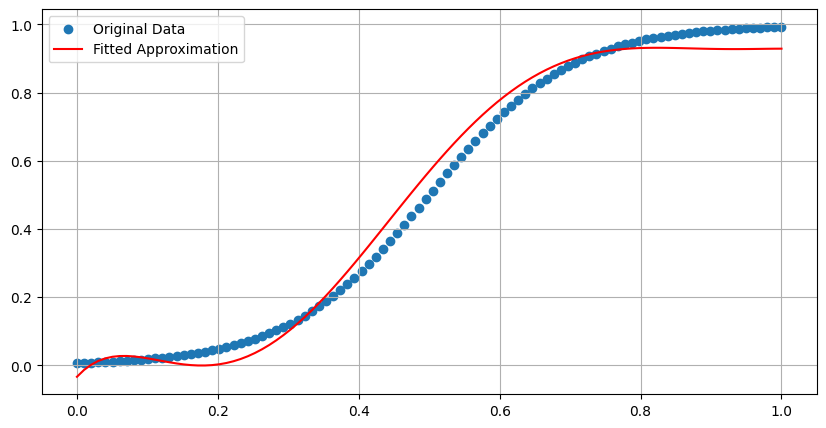

In [22]:
# Attempt to fit approximation_class to data
from scipy.optimize import curve_fit
import numpy as np

# Generate data points
x_data = np.linspace(0, 1, 100)

# Define wrapper function with fixed number of coefficients
def approx_wrapper(x, c0, c1, c2, c3):
    return approximation_class(x, c0, [c1, c2, c3])

# Generate target data (smooth function)
# Use sigmoid function: 1/(1 + exp(-k*(x-x0)))
y_data = 1 / (1 + np.exp(-10*(x_data-0.5)))

# Fit the approximation class
popt, _ = curve_fit(approx_wrapper, x_data, y_data)

# Plot the original data and fitted approximation
plt.figure(figsize=(10, 5))
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_data, approx_wrapper(x_data, *popt), 'r-', label='Fitted Approximation')
plt.legend()
plt.grid(True)


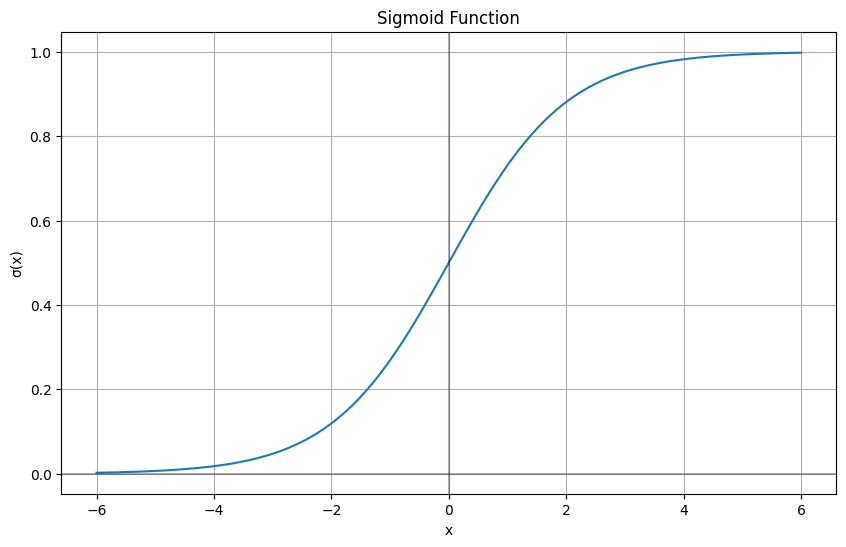

In [23]:
# Plot sigmoid function
x = np.linspace(-6, 6, 100)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.show()


In [25]:
def g_opt_inf_2(x):
    return 3.0 * x**4 - 8.0 * x**3 + 6.0 * x**2



In [33]:

def compute_expected_reward(scoring_rule, p):
    """Compute expected reward R_f(p) for a proper scoring rule f and belief p."""
    return p * scoring_rule(p) + (1 - p) * scoring_rule(1 - p)

In [34]:
def exp_g_opt_inf_2(x):
    return compute_expected_reward(g_opt_inf_2, x)

# # Plot exp_g_opt_inf_2
# plt.figure(figsize=(10, 6))



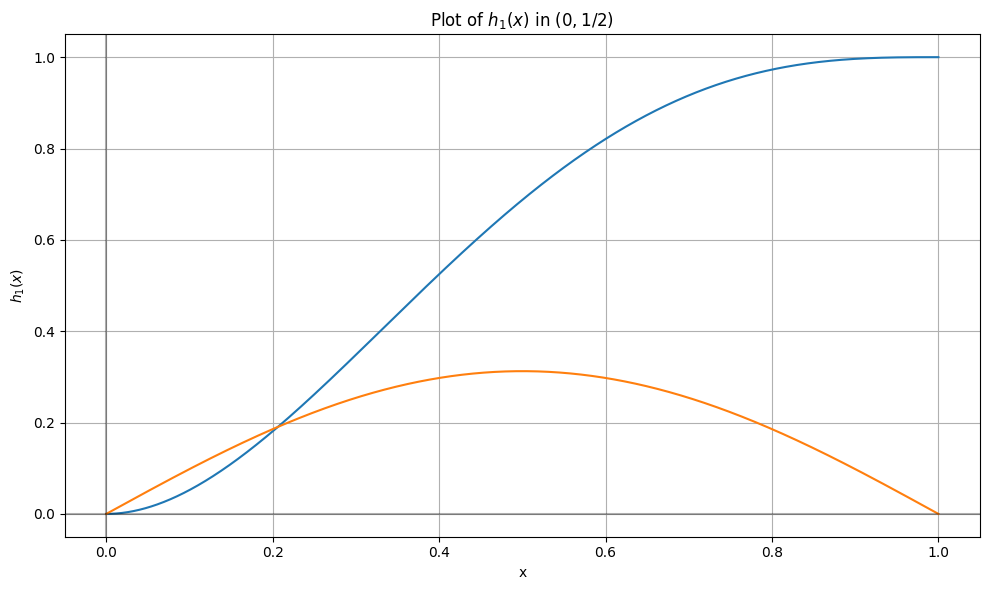

In [37]:
# Plot h_1 in (0, 1/2)
import matplotlib.pyplot as plt
import numpy as np

# Create x values in the range (0, 1/2)
x_values = np.linspace(0.0, 1, 1000)  # Avoiding exact 0 to prevent division by zero

# Calculate h_1 for each x value
h_1_values = [g_opt_inf_2(x) for x in x_values]
h_prime_values = [1-exp_g_opt_inf_2(x) for x in x_values]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, h_1_values)
plt.plot(x_values, h_prime_values)
plt.title("Plot of $h_1(x)$ in $(0, 1/2)$")
plt.xlabel("x")
plt.ylabel("$h_1(x)$")
plt.grid(True)
plt.axhline(y=0, color="k", linestyle="-", alpha=0.3)
plt.axvline(x=0, color="k", linestyle="-", alpha=0.3)
plt.tight_layout()
plt.show()

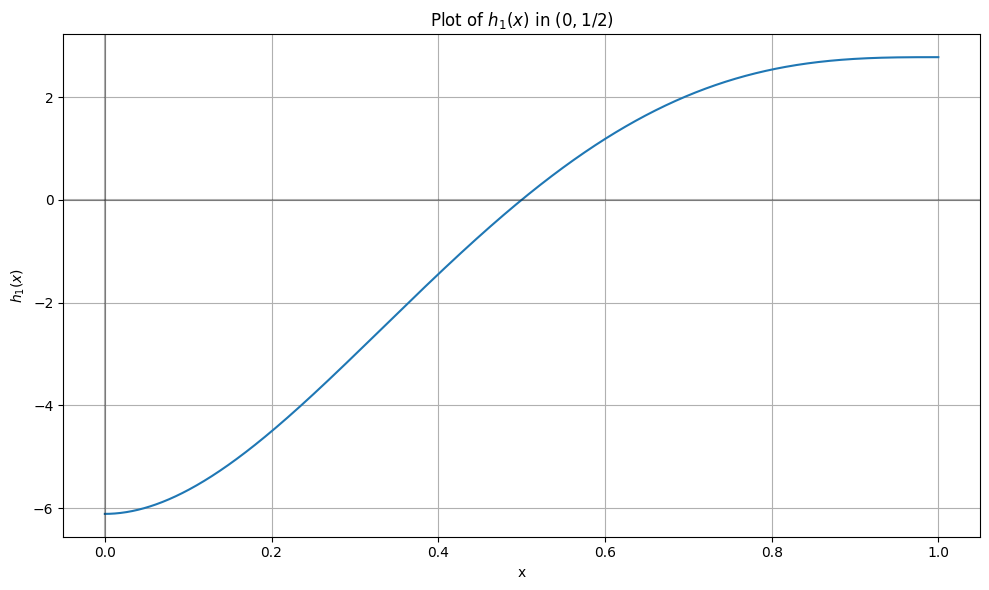

In [27]:
# Plot h_1 in (0, 1/2)
import matplotlib.pyplot as plt
import numpy as np

# Create x values in the range (0, 1/2)
x_values = np.linspace(0.0, 1, 1000)  # Avoiding exact 0 to prevent division by zero

# Calculate h_1 for each x value
h_1_values = [_g_opt_inf(x) for x in x_values]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, h_1_values)
plt.title("Plot of $h_1(x)$ in $(0, 1/2)$")
plt.xlabel("x")
plt.ylabel("$h_1(x)$")
plt.grid(True)
plt.axhline(y=0, color="k", linestyle="-", alpha=0.3)
plt.axvline(x=0, color="k", linestyle="-", alpha=0.3)
plt.tight_layout()
plt.show()

In [6]:
import numpy as np
import numpy as np
from scipy.special import beta, betainc
from scipy.integrate import quad
import sympy as sp


x = sp.symbols("x", real=True, domain=sp.Interval(0, 1), positive=True)
t = sp.symbols("t", real=True, domain=sp.Interval(1 / 2, 1), positive=True)
ell = sp.symbols("ell", positive=True)

integrand_1 = ((t ** (ell - 8)) * (1 - t) ** (2 * ell + 4)) ** (1 / (ell + 4))
integrand_2 = ((t**ell) * (1 - t) ** (2 * ell - 4)) ** (1 / (ell + 4))


In [15]:
integrand_1.subs(ell, 1)

Abs(t - 1)**(6/5)/t**(7/5)

In [14]:

integrand_2.subs(ell, 1)

t**(1/5)/Abs(t - 1)**(2/5)

In [19]:
sp.integrate(t**sp.Rational(1,3), (t, 1 / 2, x))

3*x**(4/3)/4 - 0.297637697244037

In [20]:
sp.integrate(t ** sp.Rational(1, 3))

3*t**(4/3)/4

In [31]:
sp.integrate(t ** sp.Rational(1, 3))
# .subs(t, 1 / 2)

3*t**(4/3)/4

In [16]:
integrand_1.subs(ell, 8)

Abs(t - 1)**(5/3)

In [17]:
integrand_2.subs(ell, 8)

t**(2/3)*Abs(t - 1)

In [9]:
integrand_1_8 = (( 1-t) ** (sp.Rational(5 ,3)))

sp.integrate(integrand_1_8, (t, 1 / 2, x))

0.0590587992138222 - 3*(1 - x)**(8/3)/8

In [ ]:
# The main result of this section is the following theorem:
# Theorem 4.1. The unique continuously differentiable normalized proper scoring rule which minimizes $\operatorname{Ind}^{\ell}(g)$ is:

# $$
# g_{\ell, \mathrm{Opt}}(x)=\left\{\begin{array}{ll}
# \kappa_{\ell} \int_{\frac{1}{2}}^{x}\left(t^{\ell-8}(1-t)^{2 \ell+4}\right)^{1 /(\ell+4)} d t & x \leq \frac{1}{2} \\
# \kappa_{\ell} \int_{\frac{1}{2}}^{x}\left(t^{\ell}(1-t)^{2 \ell-4}\right)^{1 /(\ell+4)} d t & x \geq \frac{1}{2} .
# \end{array},\right.
# $$
(sp.simplify((1 - t) / t) * integrand_1.subs(t, 1 - t))